In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class K_Means:
    def init_centroids(self, X, K):
        return np.array(random.choices(X, k=K))
    
    def find_closest_centroids(self, X, centroids):
        idx = np.zeros(len(X))
        m = len(X)
        K = len(centroids)
        for i in range(m):
            min_err = float("inf")
            for j in range(K):
                cur_err = np.linalg.norm(X[i][:] - centroids[j][:]) ** 2
                if cur_err < min_err:
                    min_err = cur_err
                    idx[i] = j
        return idx

    def compute_centroids(self, X, idx, K):
        centroids = np.zeros((K, len(X[0])))
        for k in range(K):
            centroids[k] = np.mean(X[idx == k], axis=0)
        return centroids

    def compute_cost(self, X, idx, centroids):
        m = len(X)
        K = len(centroids)
        J = 0
        for k in range(K):
            J += np.linalg.norm(X[idx == k] - centroids[k]) ** 2
        J /= m
        return J

    def fit(self, X, K, iterations=30, n_init=10):
        m = len(X)
        best_centroids = None
        best_idx = None
        min_global_err = float("inf")
        
        for _ in range(n_init):
            centroids = self.init_centroids(X, K)
            idx = np.zeros(len(X))
            for _ in range(iterations):
                idx = self.find_closest_centroids(X, centroids)
                centroids = self.compute_centroids(X, idx, K)

            J = self.compute_cost(X, idx, centroids)
            if J < min_global_err:
                min_global_err = J
                best_centroids = centroids
                best_idx = idx

        return best_centroids, best_idx, min_global_err

In [3]:
K = 5
X, y = make_blobs(n_samples=200, centers=K)

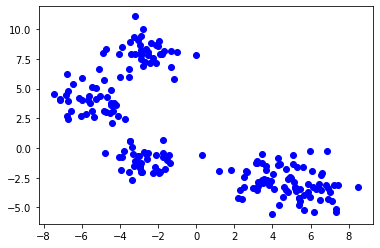

In [4]:
plt.plot(X[:,0], X[:,1], 'bo')
plt.show()

In [5]:
km = K_Means()
centroids, idx, J = km.fit(X, K, iterations=30)

C:\Users\kamil\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kamil\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [6]:
print(centroids)
print(J)

[[-2.69328056 -1.02902187]
 [ 6.05456054 -3.7189977 ]
 [-2.67014327  8.03827254]
 [ 3.67877607 -2.23234002]
 [-5.52846084  3.95106224]]
1.9657719011661081


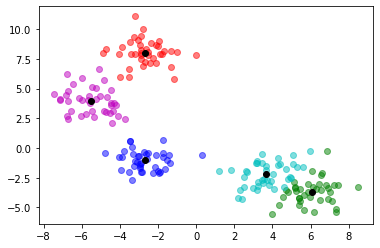

In [7]:
colors = ["b", "g", "r", "c", "m", "y"]

for k in range(K):
    plt.plot(X[idx == k, 0], X[idx == k, 1], f'{colors[k]}o', alpha=0.5)

plt.plot(centroids[:,0], centroids[:,1], 'ko')
plt.show()

In [8]:
J_values = []
for k in range(2, 8):
    km = K_Means()
    centroids, idx, J = km.fit(X, k, iterations=30, n_init=15)
    J_values.append(J)

C:\Users\kamil\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kamil\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


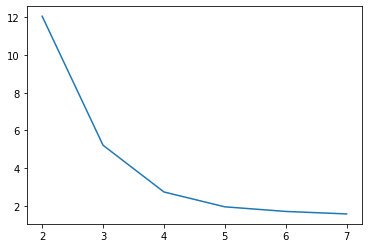

In [9]:
x = list(map(str, range(2, 8)))
plt.plot(J_values)
plt.xticks(range(len(J_values)), x)
plt.show()

In [10]:
import matplotlib.image as mpimg

In [11]:
img = mpimg.imread("bird_small.png")
img.shape

(128, 128, 3)

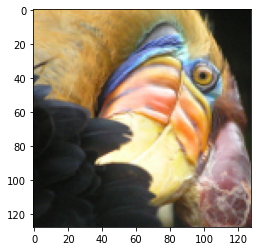

In [12]:
plt.imshow(img)
plt.show()

In [13]:
X = img.reshape(-1, 3)
X.shape

(16384, 3)

In [14]:
K = 16
km = K_Means()
centroids, idx, J = km.fit(X / 255, K, iterations=30, n_init=1)

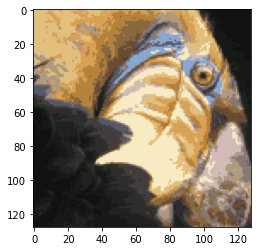

In [15]:
idx_int = np.array(list(map(int, idx)))
img_recovered = centroids[idx_int].reshape(img.shape) * 255
plt.imshow(img_recovered)
plt.imsave(f"{K}bird_small.png", img_recovered)
plt.show()

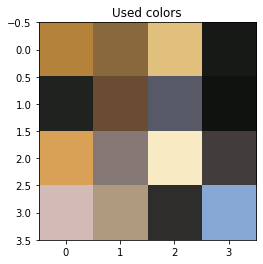

In [16]:
plt.imshow(centroids.reshape(int(np.sqrt(K)), int(np.sqrt(K)), 3) * 255)
plt.title("Used colors")
plt.show()